# SEMANA TEC TS1001S Convolucion/Padding


Aqui se ilustra la convolucion. Este tutorial consta de tres pasos.

1. Descargar una imagen
2. Dependencias
3. Aplicar una convolucion



## Descar de Imagen

In [ ]:
!gdown https://drive.google.com/uc?id=1cJ_XzTbiIKiuMCraz0ZSgGnByiOOxpYN --quiet


Downloading...
From: https://drive.google.com/uc?id=1cJ_XzTbiIKiuMCraz0ZSgGnByiOOxpYN
To: /content/sudoku.png
100% 39.4k/39.4k [00:00<00:00, 21.0MB/s]


In [ ]:
!ls -ltr
!pwd

total 1052
drwxr-xr-x 1 root root   4096 Oct 26 13:34 sample_data
-rw-r--r-- 1 root root 822886 Oct 28 13:21 Convolution.ipynb
-rw-r--r-- 1 root root 204851 Oct 28 13:22 Sample.png
-rw-r--r-- 1 root root  39407 Oct 28 14:32 sudoku.png


## Dependencias

In [ ]:
import matplotlib.pyplot as plt
import numpy
import math
from PIL import Image
from scipy import ndimage

## Convolucion

Aqui se abre y normaliza la imagen

In [ ]:
Is = Image.open('Sample.png');
I = Is.convert('L');
I = numpy.asarray(I);
I = I / 255.0;

Seleccionar los kernels y aplicar la convolucion

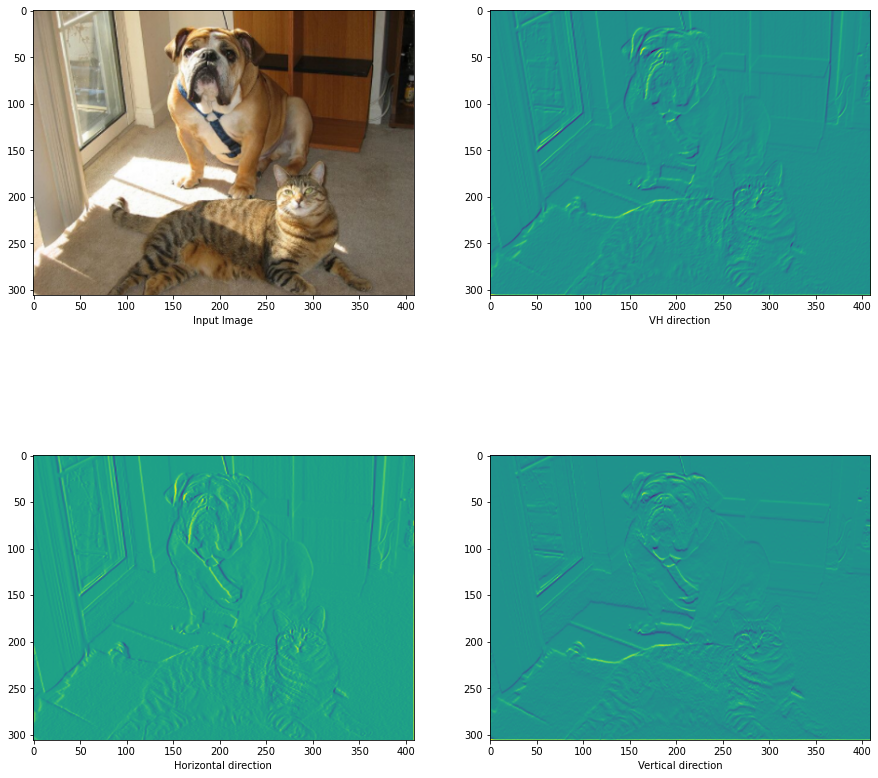

In [ ]:
k0 = numpy.array([[0,-1,0],[-1,0,1],[0,1,0]])

'''
1 -1 1
-1 4 -1
 1 -1 1
'''

k1 = numpy.array([[0,0,0],[-1,0,1],[0,0,0]])

'''
 0 0 0
-1 0 1
 0 0 0
'''


k2 = numpy.array([[0,-1,0],[0,0,0],[0,1,0]])

'''
 0 -1 0
 0  0 0
 0  1 0
'''

def create_k3():
  A=numpy.zeros(3,3))
  for x in range(-1,2):
    for y in range(-1,2):
      A[x][y]=math.exp(-1*(0.5*((x+y)**2)/2))
  print(A)
  return A

J0 = ndimage.convolve(I, k0, mode='constant', cval=0.0)
J1 = ndimage.convolve(I, k1, mode='constant', cval=0.0)
J2 = ndimage.convolve(I, k2, mode='constant', cval=0.0)
J3 = ndimage.convolve(I, create_k3, mode='constant', cval=0.0)

plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.imshow(Is)
plt.xlabel('Input Image')

plt.subplot(2,2,2)
plt.imshow(J0)
plt.xlabel('VH direction')

plt.subplot(2,2,3)
plt.imshow(J1)
plt.xlabel('Horizontal direction')
'''
plt.subplot(2,2,4)
plt.imshow(J2)
plt.xlabel('Vertical direction')
'''
plt.subplot(2,2,4)
plt.imshow(J3)
plt.xlabel('Exponential')


plt.grid(False)
plt.show()

## Padding

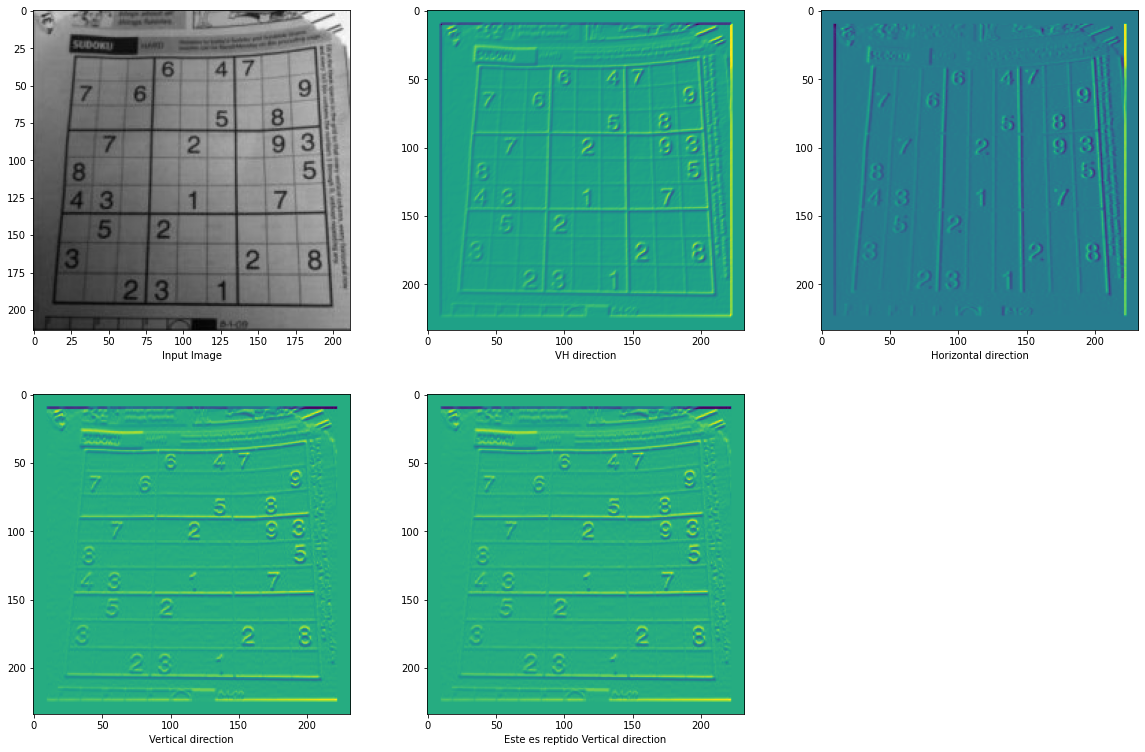

In [ ]:
Is = Image.open('sudoku.png'); # imagen del sudo
I = Is.convert('L'); # se convierte a escala de grises
I = numpy.asarray(I); # conversion numerica para poder operar de 0-1
I = I / 255.0; # normalizacion 0 - 1

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

I = numpy.pad(I, 10, pad_with, padder=0)

M = kernel(sigma, alpha, I, )

kM = numpy.array(M)

k0 = numpy.array([[0,-1,0],[-1,0,1],[0,1,0]])
k1 = numpy.array([[0,0,0],[-1,0,1],[0,0,0]])
k2 = numpy.array([[0,-1,0],[0,0,0],[0,1,0]])

J0 = ndimage.convolve(I, k0, mode='constant', cval=0.0)
J1 = ndimage.convolve(I, k1, mode='constant', cval=0.0)
J2 = ndimage.convolve(I, k2, mode='constant', cval=0.0)

plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
plt.imshow(Is)
plt.xlabel('Input Image')

plt.subplot(3,3,2)
plt.imshow(J0)
plt.xlabel('VH direction')

plt.subplot(3,3,3)
plt.imshow(J1)
plt.xlabel('Horizontal direction')

plt.subplot(3,3,4)
plt.imshow(J2)
plt.xlabel('Vertical direction')

plt.subplot(3,3,5)
plt.imshow(J2)
plt.xlabel('Este es reptido Vertical direction')


#plt.grid(False)
plt.show()